# Семинар 1 (19.01.2022)

[Содержание](https://drive.google.com/file/d/1eWgF8If1flQNreteHkaCxLMG8A86uVCv/view)

[Данные](https://drive.google.com/drive/folders/13Sa_-T4kfDm447IJp1JnVYCAqLa4iu8C)

Glimmer, как и другие программы, где есть "mm", основаны на скрытых марковских моделях, для нахождения генов в геноме для прокариот. 

Есть ли разница нахождения генома у прокариот и эукариот? Да, потому что у них разное устройство генов, таким образом не можем использовать одинаковые программы для них. 

Где сложнее находить гены? Рассмотрим марковскую модель для прокариот. Состояние "не ген" должно переходить в состояние "не ген" и само в себя, пишем еще begin и end (чисто для модели)

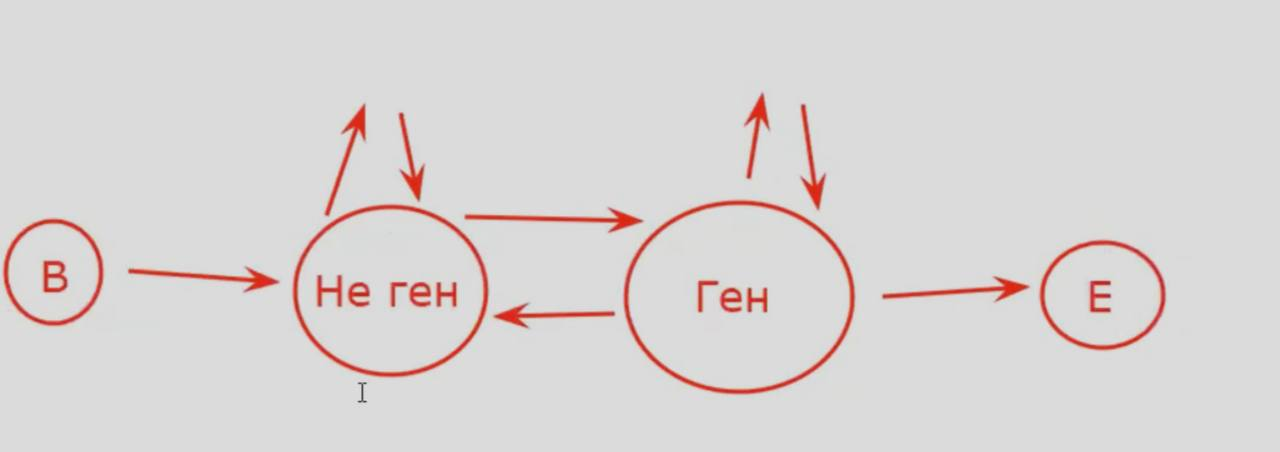

 Для эукариот нужно еще учитывать интроны / экзоны, первый и последний можно рассматривать отдельно (обозначают конец / начало), промоторы, нетранслирующие области. Их всех мы по - хорошему тоже хотим находить - это тоже будут скрытыми состояниями. Поэтому модели прокариот и эукариот будут различаться. У эукариот модель будет сложнее, поэтому рассматриваем прокариот.

Для эукариот уже есть преобученные модели, и в целом они натренированны на видах, которые, как мы предполагаем, наиболее близки к нашему (там внутри машинное обучение).

## Работа с Glimmer

[Сайт с информацией](https://ccb.jhu.edu/software/glimmerhmm/)

На сайте с инфой можно найти [ссылку для загрузки](https://ccb.jhu.edu/software/glimmerhmm/dl/GlimmerHMM-3.0.4.tar.gz), либо использовать colab:


In [ ]:
! wget http://ccb.jhu.edu/software/glimmer/glimmer302b.tar.gz

--2022-03-30 09:48:45--  http://ccb.jhu.edu/software/glimmer/glimmer302b.tar.gz
Resolving ccb.jhu.edu (ccb.jhu.edu)... 128.220.233.141
Connecting to ccb.jhu.edu (ccb.jhu.edu)|128.220.233.141|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5637975 (5.4M) [application/x-gzip]
Saving to: ‘glimmer302b.tar.gz’

glimmer302b.tar.gz  100%[===================>]   5.38M  1.37MB/s    in 3.9s    

2022-03-30 09:48:49 (1.37 MB/s) - ‘glimmer302b.tar.gz’ saved [5637975/5637975]



Мы скачали архив, с помощью tar разархивируем, идем в src и компидируем:

In [ ]:
%%bash
tar xzf glimmer302b.tar.gz
cd glimmer3.02/
cd src/
make

* Make Target is  all
#####    Making Directory  /content/glimmer3.02/src/Common   all  #####
make[1]: Entering directory '/content/glimmer3.02/src/Common'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/glimmer3.02/src/Common'
#####    Making Directory  /content/glimmer3.02/src/ICM   all  #####
make[1]: Entering directory '/content/glimmer3.02/src/ICM'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/glimmer3.02/src/ICM'
#####    Making Directory  /content/glimmer3.02/src/Glimmer   all  #####
make[1]: Entering directory '/content/glimmer3.02/src/Glimmer'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/glimmer3.02/src/Glimmer'
#####    Making Directory  /content/glimmer3.02/src/Util   all  #####
make[1]: Entering directory '/content/glimmer3.02/src/Util'
make[1]: Nothing to be done for 'all'.
make[1]: Leaving directory '/content/glimmer3.02/src/Util'
* Make Target is  all
#####    Making Directory  /cont

Необходимые нам тестовые варианты находятся в папке ./glimmer3.02/sample-run

Это каталог, содержащий образец прогона Glimmer3. В нем содержится
последовательность генома Treponema pallidum (файл tpall.fna) и
список аннотированных генов для него (файл tpall.nh), оба загружены из GenBank.

Этапы: Сперва нам необходимо натренировать модель. Для этого в папке
./glimmer3.02/sample-run уже есть пример с fasta (from-training.train)

### Запустим генерацию модели

Создали новую папку, в которую мы кидаем результаты, затем следующей строкой задаем права пользователю (иначе будет ругаться)

In [ ]:
!mkdir -p /content/glimmer3.02/sample-run_new

In [ ]:
! chmod 755 /content/glimmer3.02/sample-run/tpall.fna

Используем утилиту long-orfs (orf - open reading frame - открытая рамка считывания. У нас есть аминокислоты, которые кодируются тремя нуклеотидами. Сколько способов прочитать аминокислоты? Шесть - три в одну сторону и три в обратную, в зависимости от места, с которого мы начнем считывание. orf - рамки считывания, которые начинаются со старт-кодона и заканчиваются стоп-кодоном. long-orfs находит такие длинные рамки. Можем задавать старт- и стоп-кодоны, могут ли рамки пересекаться - впринципе у прокариот пересечения могут происходить, у эукариот это происходит реже. Как правило, такое пересечение маленькое. Также можно задать макс. длину гена. Нужно помнить, что у нас прокариот - ген круговой. Какие - то учатски можно исключать, если мы знаем, что нам не нужны эти участки или там может быть большое количество ошибок)

bin/long-orfs --help

USAGE: long-orfs [options] \<sequence-file> \<output-file>

In [ ]:
! /content/glimmer3.02/bin/long-orfs -n -t 1.15 /content/glimmer3.02/sample-run/tpall.fna /content/glimmer3.02/sample-run_new/orf.positions

Starting at Wed Mar 30 10:48:45 2022

Sequence file = /content/glimmer3.02/sample-run/tpall.fna
Excluded regions file = none
Circular genome = true
Initial minimum gene length = 90 bp
Determine optimal min gene length to maximize number of genes
Maximum overlap bases = 30
Start codons = atg,gtg,ttg
Stop codons = taa,tag,tga
Sequence length = 1138011
Final minimum gene length = 631
Number of genes = 514
Total bases = 674580


In [ ]:
!head /content/glimmer3.02/sample-run_new/orf.positions


00001       4    1398  +1   0.781
00002    4391    6832  +2   0.683
00003    7317    7967  +3   0.673
00004   12545   13210  +2   0.835
00005   18380   19351  +2   0.859
00006   19418   21391  +2   0.735
00007   21396   22046  +3   0.759
00008   22046   24169  +2   1.023
00009   27557   28888  +2   0.856
00010   29068   29778  +1   0.811


Посмотрели файл (вывели первые 10 строк). Тут оказаны рамки, их позиции, +1 +2 +3 -1 -2 -3 - так как у нас всего 6 вариантов, вес, подсчитанный программой.

Найденные на предыдущем этапе ORF для тренировки - это результат работы готовой
модели. Мы воспользовались уже существующей моделью, только для того, чтобы
сгенерировать для себя обучающую выборку.

### Трансформируем отобранные позиции orf в fasta

Используем утилиту extract из glimmer - извлекаем последовательности

In [ ]:
!/content/glimmer3.02/bin/extract -t /content/glimmer3.02/sample-run/tpall.fna /content/glimmer3.02/sample-run_new/orf.positions > /content/glimmer3.02/sample-run_new/orf.fasta

In [ ]:
# Используем help для просмотра параметров
!! /content/glimmer3.02/bin/long-orfs

['Starting at Wed Mar 30 10:48:56 2022',
 '',
 'USAGE:  long-orfs [options] <sequence-file> <output-file>',
 '',
 'Read DNA sequence in <sequence-file> and find and output the',
 'coordinates of long, non-overlapping orfs in it.',
 'Output goes to file <output-file> or standard output if <output-file>',
 'is "-"',
 '',
 'Options:',
 ' -A <codon-list>',
 ' --start_codons <codon-list>',
 '    Use comma-separated list of codons as start codons',
 '    Sample format:  -A atg,gtg',
 ' -E <filename>',
 ' --entropy <filename>',
 '    Read entropy profiles from <filename>.  Format is one header',
 '    line, then 20 lines of 3 columns each.  Columns are amino acid,',
 '    positive entropy, negative entropy.  Rows must be in order',
 '    by amino acid code letter',
 ' -f',
 ' --fixed',
 '    Do *NOT* automatically determine the minimum gene length so as',
 '    to maximize the total length of output regions',
 ' -g <n>',
 ' --min_len <n>',
 '    Only genes with length >= <n> will be considere

In [ ]:
!head /content/glimmer3.02/sample-run_new/orf.fasta

>00001  4 1398  len=1392
ATGGACGCAGTAGGGTATGAAGTATTCTGGAACGAGACACTCAGCCAGATACGGAGTGAA
TCGACCGAAGCAGAATTTAACATGTGGTTTGCTCATTTGTTCTTTATCGCATCTTTTGAA
AACGCTATCGAAATAGCAGTACCTTCAGACTTTTTCCGAATACAGTTTAGCCAAAAATAT
CAAGAAAAGCTTGAGCGCAAGTTCCTCGAACTTTCTGGACACCCCATTAAACTTTTGTTT
GCCGTTAAAAAAGGCACCCCTCATGGAAATACTGCTCCCCCCAAACACGTGCATACCTAC
CTGGAGAAAAACTCTCCTGCAGAGGTTCCTTCCAAAAAGAGCTTTCACCCCGACCTGAAC
AGAGACTATACCTTCGAGAACTTTGTATCCGGAGAAGAAACCAAATTCAGCCATAGCGCT
GCTATCTCCGTATCAAAAAACCCAGGCACTTCCTACAATCCGTTACTTATCTACGGTGGA
GTGGGACTAGGAAAAACCCACCTTATGCAGGCTATTGGACACGAGATCTACAAGACAACA


Получили multiple fasta файл, в названии стоит номер орфа, его координаты, длина, а дальше идет последовательность. Для него можем запустить построение марковской модели.

## Обучение модели

USAGE: build-icm [options] output_file < input-file

На вход подаются orf, параметры не меняем (в целом, можно использовать глубину модели, макс. ~8)

Глубина модели: мы можем смотреть не на предыдущую 1 позицию, а на несколько. Если мы смотрим только на 1, то теряем какую-то информацию, поэтому реальные модели используют до 8 (прирост качества прекращается где-то на 4). При этом можем смотреть только на 4, а можем на 1, 2, 3 и 4 одновременно. Модель, когда мы смотрим только на 4 - модель четвертого порядка, когда смотрим на 1 - 4 - смешанная модель (часто используются такие). Когда мы смотрим модель 3его порядка - там есть информация о кодонах, модель 2го порядка содержит информацию о динуклеотидах. Модель 4го порядка в основном выезжает за счет информации о динуклеотидах. Остальная информация играет уже меньшую роль и дольше считаются. 

In [ ]:
! /content/glimmer3.02/bin/build-icm -r /content/glimmer3.02/sample-run_new/run1.icm < /content/glimmer3.02/sample-run_new/orf.fasta

## Использование модели

На вход подаем обученную модель, указываем папку, куда это все кидаем, указываем геном. Мы используем геном Treponema pallidum - возбудитель сифилиса 

In [ ]:
! /content/glimmer3.02/bin/glimmer3 -o50 -g110 -t30 /content/glimmer3.02/sample-run/tpall.fna /content/glimmer3.02/sample-run_new/run1.icm /content/glimmer3.02/sample-run_new/run1

Starting at Wed Mar 30 10:49:09 2022

Sequence file = /content/glimmer3.02/sample-run/tpall.fna
Number of sequences = 1
ICM model file = /content/glimmer3.02/sample-run_new/run1.icm
Excluded regions file = none
List of orfs file = none
Input is NOT separate orfs
Independent (non-coding) scores are used
Circular genome = true
Truncated orfs = false
Minimum gene length = 110 bp
Maximum overlap bases = 50
Threshold score = 30
Use first start codon = false
Start codons = atg,gtg,ttg
Start probs = 0.600,0.300,0.100
Stop codons = taa,tag,tga
GC percentage = 52.8%
Ignore score on orfs longer than 799
Analyzing Sequence #1
Start Find_Orfs
Start Score_Orfs
Start Process_Events
Start Trace_Back


-o - то пересечение, которое может быть

-g - мин длина гена

-t - порог по скору 

In [ ]:
!tail -n50 /content/glimmer3.02/sample-run_new/run1.detail

        -1  1132116  1132065  1131895      219     168    -4.80     0 99  -  0  0  -  0  0
        -3  1132241  1132214  1132092      147     120    -4.27     0 90  -  -  -  -  0  9
        +3  1132605  1132689  1132811      204     120    -6.42     0  5  -  0  -  - 94  0
        -3  1132952  1132871  1132242      708     627     0.76     0 99  -  -  -  -  0  0
        -3  1133429  1133081  1132953      474     126    -0.10     0 98  -  -  -  -  0  0
        -2  1133632  1133524  1133402      228     120    -3.55     0 98  -  -  -  0  -  1
        -3  1133684  1133657  1133430      252     225     1.05     0 99  -  -  -  -  0  0
1711    -3  1133825  1133804  1133685      138     117     0.23    32 42  -  0  -  - 32 24
1712    +1  1131460  1131472  1133844     2382    2370     3.14    99 99  -  -  -  -  -  0
1713    +3  1133562  1133799  1133945      381     144    -0.50    33  -  - 33  -  -  - 66
        +2  1134089  1134116  1134232      141     114    -9.92     0  0  0  -  -  - 42 57

Тут указаны рамки считывания, координаты и скоры

In [ ]:
! head -n50 /content/glimmer3.02/sample-run_new/run1.detail

Command:  /content/glimmer3.02/bin/glimmer3 -o 50 -g 110 -t 30 /content/glimmer3.02/sample-run/tpall.fna /content/glimmer3.02/sample-run_new/run1.icm /content/glimmer3.02/sample-run_new/run1

Sequence file = /content/glimmer3.02/sample-run/tpall.fna
Number of sequences = 1
ICM model file = /content/glimmer3.02/sample-run_new/run1.icm
Excluded regions file = none
List of orfs file = none
Input is NOT separate orfs
Independent (non-coding) scores are used
Circular genome = true
Truncated orfs = false
Minimum gene length = 110 bp
Maximum overlap bases = 50
Threshold score = 30
Use first start codon = false
Start codons = atg,gtg,ttg
Start probs = 0.600,0.300,0.100
Stop codons = taa,tag,tga
GC percentage = 52.8%
Ignore score on orfs longer than 799


>gi|15638995|ref|NC_000919.1| Treponema pallidum subsp. pallidum str. Nichols, complete genome
Sequence length = 1138011

           ----- Start -----           --- Length ----  ------------- Scores -------------
 ID  Frame   of Orf  of Gene  

Тут есть различные метрики качества (Scores) и координаты генов

In [ ]:
! head /content/glimmer3.02/sample-run_new/run1.predict

>gi|15638995|ref|NC_000919.1| Treponema pallidum subsp. pallidum str. Nichols, complete genome
orf00001        4     1398  +1     6.22
orf00003     1641     2756  +3     2.89
orf00004     2776     3834  +1     5.47
orf00005     3863     4264  +2     2.77
orf00006     4391     6832  +2     7.08
orf00007     6832     7074  +1     0.25
orf00008     7317     7967  +3     6.92
orf00009     7997     8260  +2     2.91
orf00010     9515     8340  -3     2.80


Алгоритм может работать интересным образом, но в нем заложена устойчивость, и в основном при разных запусках получится одно и то же

Тут указаны orf, начало, конец, затем рамка считывания и score

Про рамки - у нас координаты, с которой начинается считывание, указано, а рамка считывания отсчитывается от начала генома.

Score - грубо говоря, чем больше, тем лучше.

In [ ]:
!/content/glimmer3.02/bin/extract -t /content/glimmer3.02/sample-run/tpall.fna /content/glimmer3.02/sample-run_new/run1.predict > /content/glimmer3.02/sample-run_new/genes.fasta

ERROR:  Skipped following coord line
>gi|15638995|ref|NC_000919.1| Treponema pallidum subsp. pallidum str. Nichols, complete genome


In [ ]:
! head -n50 /content/glimmer3.02/sample-run_new/genes.fasta

>orf00001  4 1398  len=1392
ATGGACGCAGTAGGGTATGAAGTATTCTGGAACGAGACACTCAGCCAGATACGGAGTGAA
TCGACCGAAGCAGAATTTAACATGTGGTTTGCTCATTTGTTCTTTATCGCATCTTTTGAA
AACGCTATCGAAATAGCAGTACCTTCAGACTTTTTCCGAATACAGTTTAGCCAAAAATAT
CAAGAAAAGCTTGAGCGCAAGTTCCTCGAACTTTCTGGACACCCCATTAAACTTTTGTTT
GCCGTTAAAAAAGGCACCCCTCATGGAAATACTGCTCCCCCCAAACACGTGCATACCTAC
CTGGAGAAAAACTCTCCTGCAGAGGTTCCTTCCAAAAAGAGCTTTCACCCCGACCTGAAC
AGAGACTATACCTTCGAGAACTTTGTATCCGGAGAAGAAACCAAATTCAGCCATAGCGCT
GCTATCTCCGTATCAAAAAACCCAGGCACTTCCTACAATCCGTTACTTATCTACGGTGGA
GTGGGACTAGGAAAAACCCACCTTATGCAGGCTATTGGACACGAGATCTACAAGACAACA
GACCTGAACGTCATATACGTCACTGCGGAGAATTTTGGAAATGAATTCATTTCCACATTA
CTCAATAAAAAGACCCAGGATTTTAAAAAAAAATACCGCTACACCGCGGATGTACTTCTT
ATAGATGACATTCATTTTTTTGAAAACAAAGACGGATTACAAGAAGAGCTTTTCTATACG
TTCAACGAACTTTTCGAGAAAAAAAAACAAATTATCTTTACCTGCGACAGGCCTGTACAA
GAATTGAAAAATCTCTCTTCTCGCTTACGCTCGAGGTGCTCCCGAGGGCTTAGCACTGAT
CTGAATATGCCATGTTTTGAAACGCGCTGTGCTATCTTGATTAAAAAAATACAAAACTAT
AACAGCACCTATCCTCACAAAGCCATCCACATTTCAGACGATGTTGTCCGACTTGTT

Закинем эту последовательность в blastn (можно указать, что это трепонема, но по приколу мы не будем это делать).

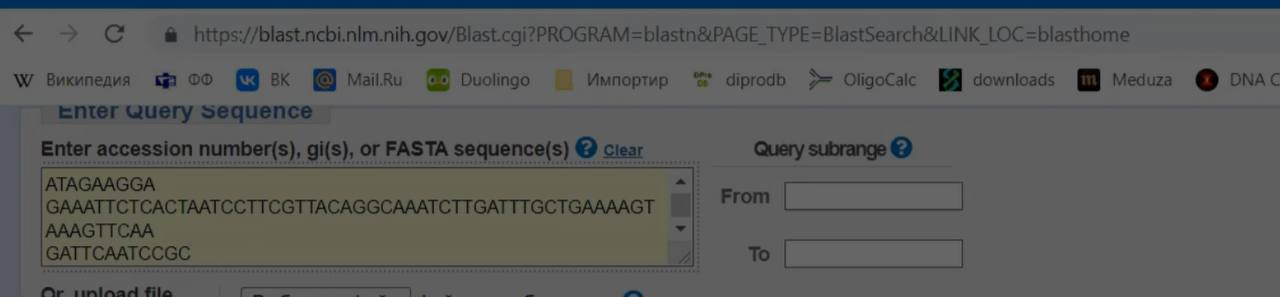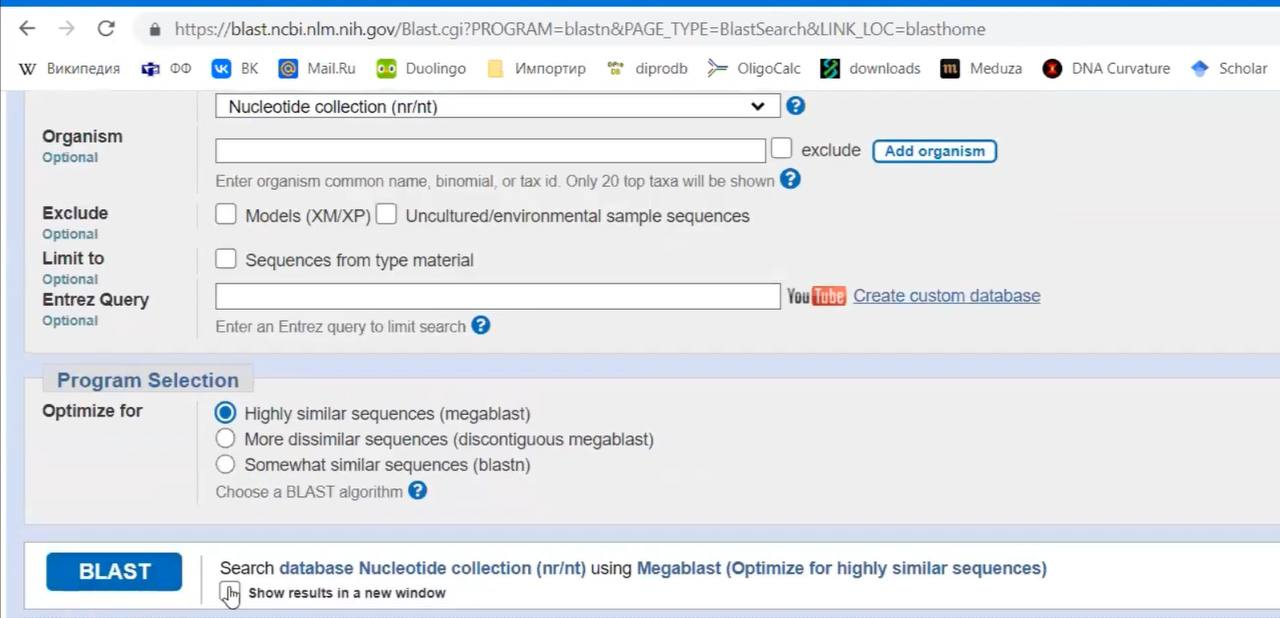

BLAST показывает, что это трепонема

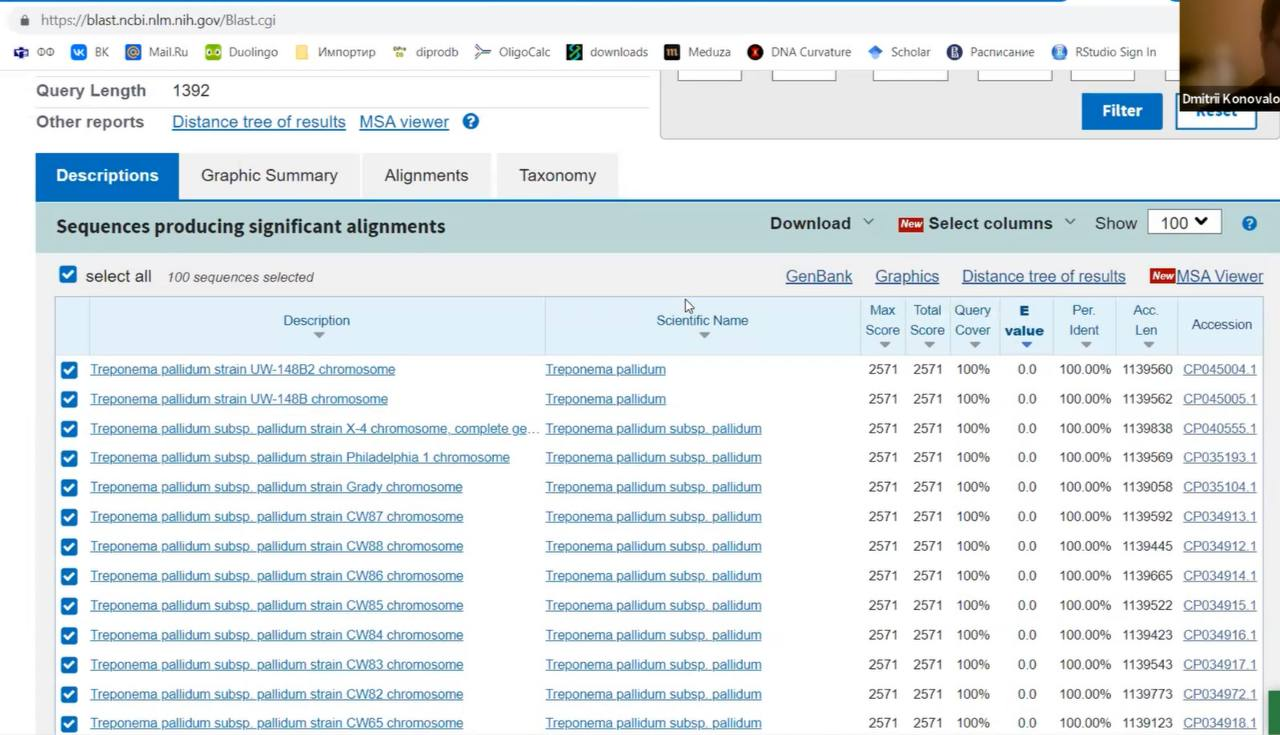

Используем blastx (по параметрам то же самое) - можем попытаться понять, действительно ли это белок, и если да, то какой.

Обнаруживаем, что BLAST идентифицировал это как белок

## [GeneMark](http://opal.biology.gatech.edu/GeneMark/)

Программа на марковских цепях. Используется для нахождения генов в разных ситуациях. Для бактерий - GeneMarkS

Скачиваем файл /content/glimmer3.02/sample-run/tpall.fna - ген трепонемы и кидаем в GeneMark, чтобы сравнить предсказания.

Запуск:

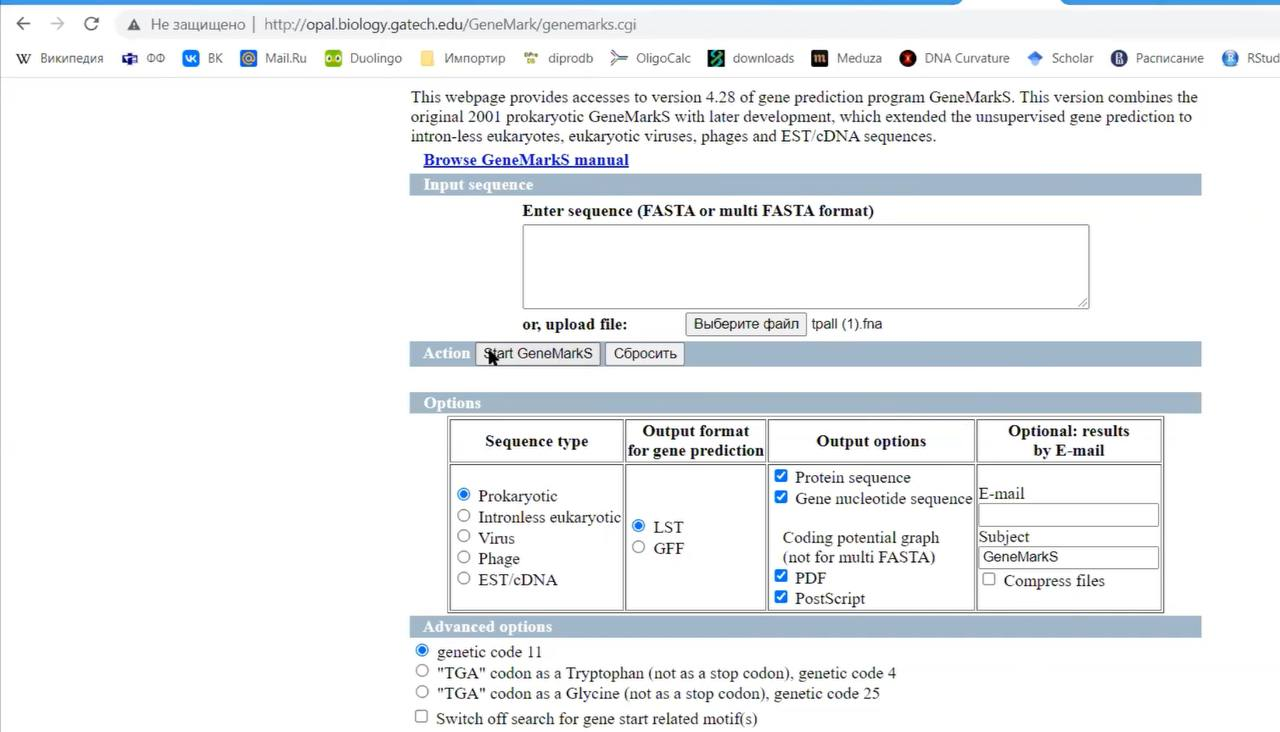

Можем проаннотировать геном, используя результаты в ncbi. Так обычно и делают при анотации

GeneMark досчитал результаты.

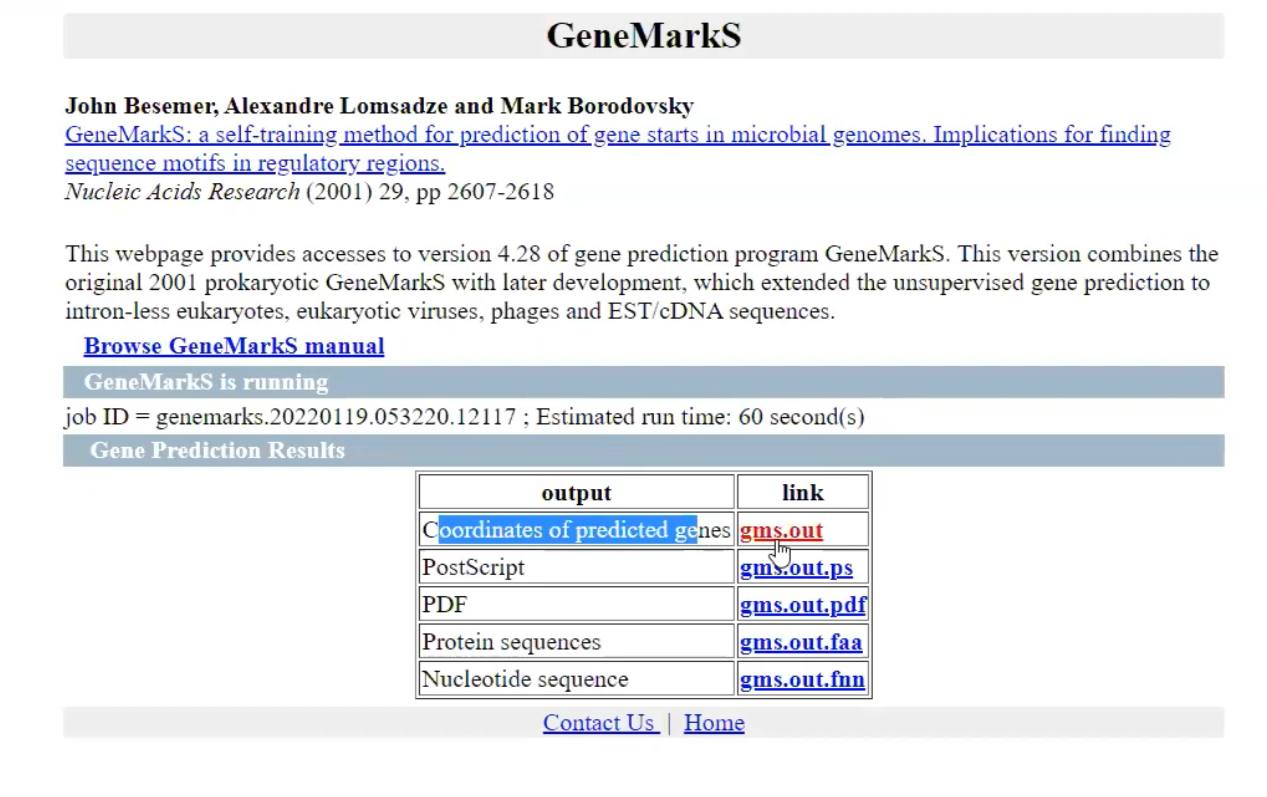

Сверим результаты (смотрим на первую строку того, что навычисляли мы, и то что вычислил GeneMark). 

Если посмотреть на количество найденных генов, то glimmer нашел больше генов, чем GeneMark. Не исследуя вопрос, нельзя сказать, кто ошибся, потому что все это предсказания. Чтобы точно узнать, можно сравнить предсказания и сверить аннотации в базе ncbi. Можно померить метрику джакарта - intersection of union (объединение пересечения). Берем две разметки, их координаты, длину их пересечения делим на длину объединения.

Если посмотреть через ncbi, то там аннотировано 967 протеинов. То, что у нас насчиталось больше - возможно, там посчитались РНК, но это маловероятно (мы подавали открытые рамки считывания, тРНК таким образом не поймаются без особых пометок). Таким образом, обе программы выдумали около 40 лишних генов.

Второй вариант - при аннотации 40 генов пропустили, но такое еще меньнее вероятно.

Когда смотрим различные базы, надо проверять, как получена его аннотация. К автоматической нужно относиться аккуратнее.

[Устройство аннотации в ncbi](https://www.ncbi.nlm.nih.gov/genome/annotation_prok/process/)

refseq - аннотация не автоматическая, поэтому более надежная 

Теперь в GeneMark укажем, что трепонема это вирус.

Будет отличаться количество генов, но начальные примерно схожи. Глобально где-то дальше могут быть отличны результаты. Об этом нужно помнить в контексте эукариот.

## [Prodigal](https://github.com/hyattpd/Prodigal), prokka